## Networks
A network (a.k.a. graph) is a collection of nodes (or vertices) connected by links (or edges). 
In python, networks can be analyzed with the libraries networkx (https://networkx.org/documentation/stable/index.html) and igraph (https://igraph.org/python/). Here, we will use the former.

In [4]:
import matplotlib.pyplot as pl
import networkx as nx

## A real-world example: Zachary's Karate Club
Zachary's Karate Club, introduced in 1977 by Wayne Zachary (http://www1.ind.ku.dk/complexLearning/zachary1977.pdf) is one of the most popular examples of networks, used to show and understand in practice the main graph properties. The network models the relationships between 34 members of a karate club: each node represents an individual, and the links show the interactions between individuals outside of the karate club setting. 
The network has two main players: the 'Officer' (node 33) and the instructor (Mr. Hi, node 0). A rift occurred between Mr Hi and the Officer, causing the karate club to splinter into two new clubs, each led by one of them. It can be shown that it is possible to predict the membership to one of the new factions by looking only at the relationships provided by the network.

In [8]:
# Zachary's Karate Club is included in the library networkx
# hence, we just need to import it and retrieve the club labels of each node
zach = nx.karate_club_graph()
club_labels = nx.get_node_attributes(zach,'club')
print(club_labels)

{0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}


In [41]:
# a network can be represented by an adjacency matrix
# each entry (i,j) of the matrix represent the (possible) link between node i and node j (0 meaning no link)
A = nx.convert_matrix.to_numpy_matrix(zach)
print(A)
# the considered graph is both undirected and unweighted;
# the links have no associated direction (the adjacency matrix is therefore symmetric) 
# moreover, the edges can only take a binary value of either 1 or 0 
# in the case of weighted networks, the edges can take any value, representing the strength of the connection

sss [[0. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 1. 0.]
 ...
 [1. 0. 0. ... 0. 1. 1.]
 [0. 0. 1. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


## Plotting networks
Networks (particularly the ones with a limited amount of nodes and links) can be easily plotted with networkx and matplotlib. 
The list of possible layouts can be found at https://networkx.org/documentation/stable/reference/drawing.html.

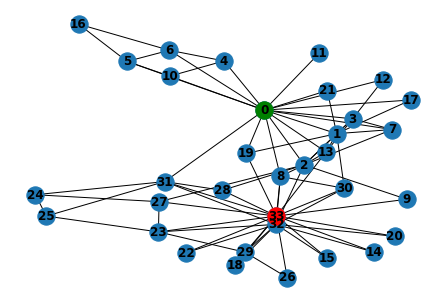

In [17]:
# layout definition and plot:
layout = nx.spring_layout(zach) 
nx.draw(zach, pos=layout, with_labels=True, font_weight='bold')
# we can highlight the positions of the two faction leaders:
nx.draw_networkx_nodes(zach, pos=layout, nodelist=[0], node_color='g', alpha=1)
nx.draw_networkx_nodes(zach, pos=layout, nodelist=[33], node_color='r', alpha=1)

## Network statistics
Among the main network properties, we can mention the link density (number of edges compared to the total possible number of edges) and the degree (number of edges each node has, showing how important each vertex is).

In [20]:
density = nx.density(zach)
print('Link density = ' + str(round(density,3)))

Link density = 0.139


In [23]:
degree = zach.degree()
degree_list = []
for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)
print('Average degree = ' + str(round(av_degree,2)))

Average degree = 4.59


Text(0.5, 1.0, 'Karate Club: Node Degree')

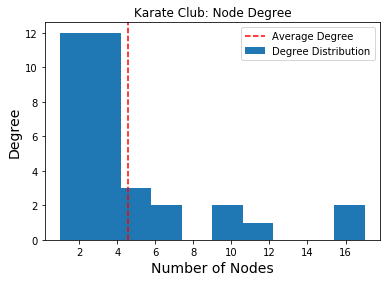

In [26]:
# for larger graphs, the typical way of showing the node degrees is by means of the degree distribution
# we can therefore plot the histogram representing the distribution:
pl.hist(degree_list,label='Degree Distribution')
pl.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
pl.legend()
pl.xlabel('Number of Nodes', fontsize=14)
pl.ylabel('Degree', fontsize=14)
pl.title('Karate Club: Node Degree')
# as in the case of many real-world networks, the majority of members of the club do not have many links (mostly 2 or 3 links);
# however, a few nodes (which in our case correspond to Mr Hi and the Officer) have a lot of links

## Community detection
Sometimes, a larger network can be broken down into smaller communities/clusters. This happens regularly in social networks. 
Many methods to approach community detection in networks have been developed. Here we will employ the most common one, namely the so-called modularity optimisation. Modularity is a measure of the extent to which a set of nodes is connected to another set in a network. It is basically defined, up to a multiplicative constant, as the number of edges falling within groups minus the expected number in an equivalent network with edges placed at random. Optimizing this quantity will give the best partition into clusters. 
The algorithm is already implemented in networkx.
In the case of the Karate Club the modularity optimization will allow us to predict which members will join the Officer's faction and which will join Mr. Hi's.

In [28]:
# import the modularity optimization algorithm:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

# perform the community detection:
c = list(greedy_modularity_communities(zach))

# the number of communities is given by:
print('Number of clusters = ' + str(len(c)))

Number of clusters = 3


In [31]:
# here we show which nodes compose the different clusters:
for clust in c:
    print(sorted(clust))

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


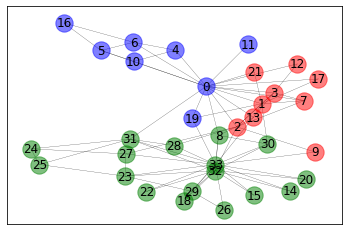

In [39]:
# we can finally plot the network, showing the new memberships:
cluster_0 = sorted(c[0])
cluster_1 = sorted(c[1])
cluster_2 = sorted(c[2])

nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_2, node_color='b', alpha=0.5)

#now we can add edges to the drawing 
nx.draw_networkx_edges(zach, pos=layout, stlye='dashed', width = 0.2)

#finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(zach, pos=layout)

pl.show()

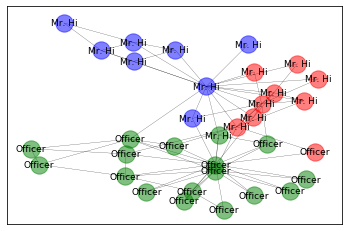

In [43]:
# if we plot the same network including the label of which club each individual will join:
nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_2, node_color='b', alpha=0.5)

nx.draw_networkx_edges(zach, pos=layout, stlye='dashed', width = 0.2) 
nx.draw_networkx_labels(zach, pos=layout, labels=club_labels,font_size=9)
pl.show()

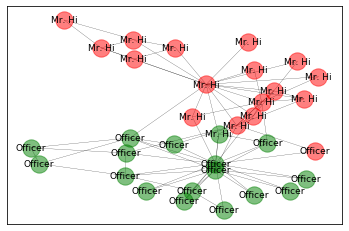

In [44]:
# as we can see, three clusters have been found; Mr. Hi's faction seems already internally separated
# if we combine those two sub-clubs (communities 1 and 2) and plot it again:
combined_cluster = cluster_1 + cluster_2

nx.draw_networkx_nodes(zach, pos=layout, nodelist=cluster_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(zach, pos=layout, nodelist=combined_cluster, node_color='r', alpha=0.5)

nx.draw_networkx_edges(zach, pos=layout, stlye='dashed', width = 0.2) 
nx.draw_networkx_labels(zach, pos=layout, labels=club_labels,font_size=9)
pl.show()

# we see that only one node is misplaced w.r.t to the actual new membership